## Dimensionality Reduction: kaggle Social Network Ads Dataset
https://www.kaggle.com/rakeshrau/social-network-ads

** Dataset Information: **

400 users purchased/not purchased a particular product

** Attribute Information: (4 features and 1 class) **

- User ID
- Gender
- Age
- EstimatedSalary
- Purchased

** Objective of this project **

Predict whether users purchased or not based on two features (Age and Salary) with PCA & Kernel PCA applied

## Data

In [13]:
#options(warn=-1)
# Load Data
df  <- read.csv('Social_Network_Ads.csv')

In [14]:
# Inspect Data
head(df,3)
colnames(df)[5] <- 'label'

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0


In [15]:
dim(df)

[1] 400   5

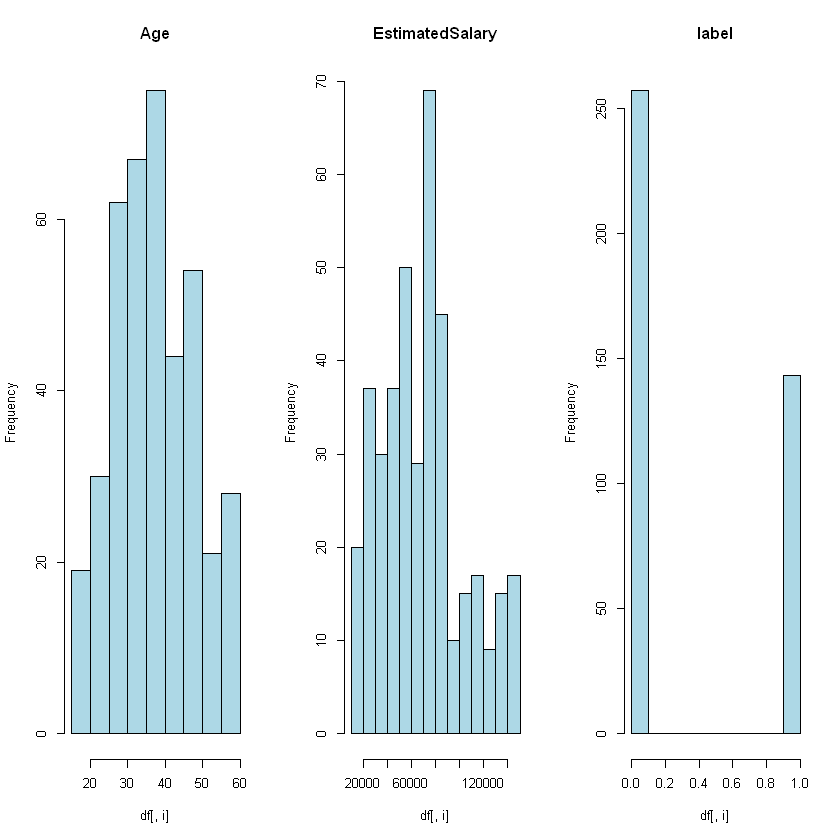

In [18]:
par(mfrow=c(1,3))
for(i in 3:5) {
    hist(df[,i], main=names(df)[i], col='lightblue')
}

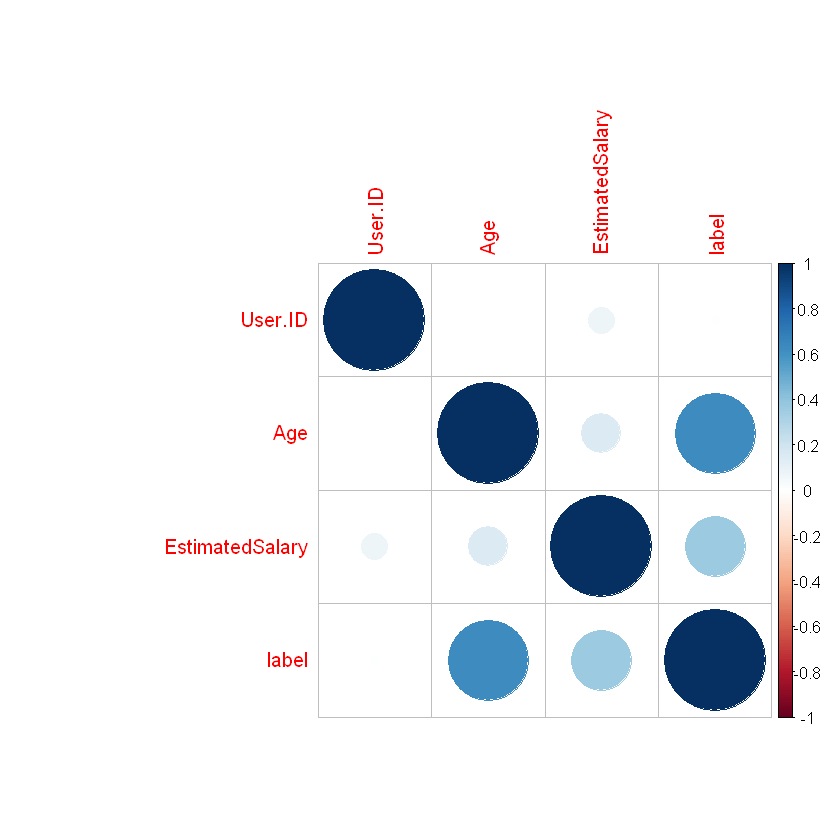

In [20]:
library(corrplot)
corrplot(cor(df[-2]), method="circle")

In [21]:
str(df)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ label          : int  0 0 0 0 0 0 0 1 0 0 ...


In [22]:
summary(df)

    User.ID            Gender         Age        EstimatedSalary 
 Min.   :15566689   Female:204   Min.   :18.00   Min.   : 15000  
 1st Qu.:15626764   Male  :196   1st Qu.:29.75   1st Qu.: 43000  
 Median :15694342                Median :37.00   Median : 70000  
 Mean   :15691540                Mean   :37.66   Mean   : 69743  
 3rd Qu.:15750363                3rd Qu.:46.00   3rd Qu.: 88000  
 Max.   :15815236                Max.   :60.00   Max.   :150000  
     label       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3575  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [23]:
table(df$label) #imbalanced labels


  0   1 
257 143 

In [24]:
any(is.na(df))

[1] FALSE

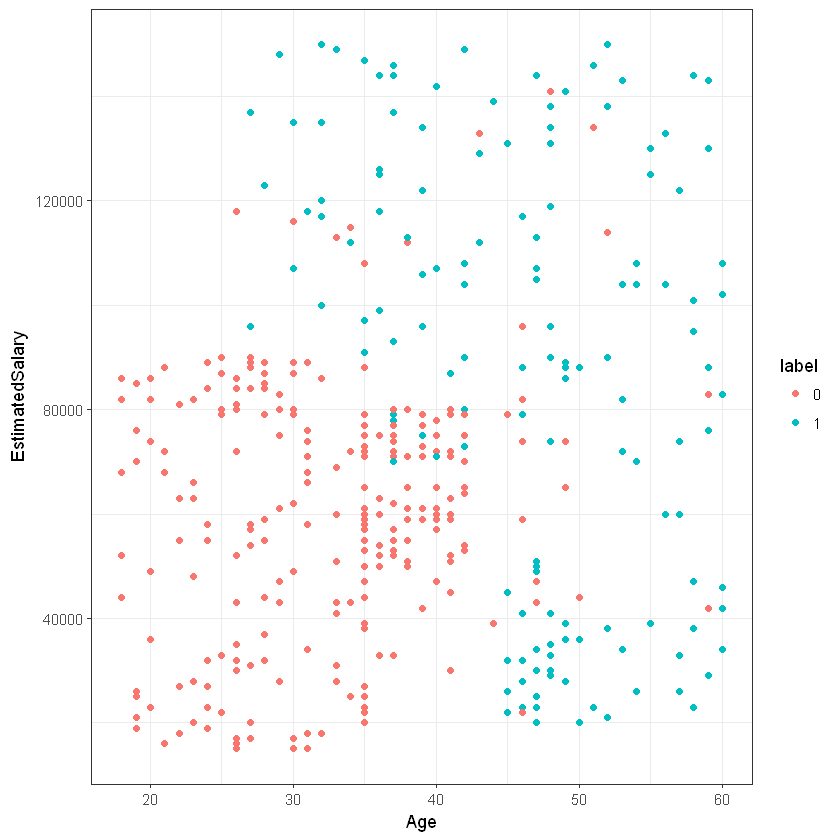

In [33]:
library(ggplot2)
ggplot(df,aes(Age,EstimatedSalary)) +
    geom_point(aes(color=label)) + theme_bw()

## Data preprocessing

In [29]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

Loading required package: lattice


** Encode Label **

In [30]:
df = df[,3:5]
df$label = factor(df$label, labels=c(0,1))
table(df$label)
str(df)


  0   1 
257 143 

'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ label          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


** Split Train Test Sets **

In [34]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

In [35]:
# standardize data
label_col  = 3
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

      Age           EstimatedSalary   label  
 Min.   :-1.94642   Min.   :-1.5703   0:206  
 1st Qu.:-0.77362   1st Qu.:-0.7644   1:114  
 Median :-0.08949   Median :-0.0161          
 Mean   : 0.00000   Mean   : 0.0000          
 3rd Qu.: 0.79011   3rd Qu.: 0.5307          
 Max.   : 2.15838   Max.   : 2.3152          

## Baseline Model

In [37]:
# Train/Evaluate Logistic Regression 
model = glm(formula = label ~ ., data = train_set,
            family = binomial)
prob_pred = predict(model, type = 'response', newdata = test_set[-label_col])
predictions = ifelse(prob_pred > 0.5, 1, 0)
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46 12
         1  5 17
                                          
               Accuracy : 0.7875          
                 95% CI : (0.6817, 0.8711)
    No Information Rate : 0.6375          
    P-Value [Acc > NIR] : 0.002823        
                                          
                  Kappa : 0.515           
 Mcnemar's Test P-Value : 0.145610        
                                          
            Sensitivity : 0.9020          
            Specificity : 0.5862          
         Pos Pred Value : 0.7931          
         Neg Pred Value : 0.7727          
             Prevalence : 0.6375          
         Detection Rate : 0.5750          
   Detection Prevalence : 0.7250          
      Balanced Accuracy : 0.7441          
                                          
       'Positive' Class : 0               
                                          

## 1. Principal Component Analysis (PCA)

In [38]:
# Apply PCA
library(e1071)
pca = preProcess(x = train_set[-label_col], method = 'pca', pcaComp = 2)
train_pca = predict(pca, train_set)
train_pca = train_pca[c(2, 3, 1)]
test_pca = predict(pca, test_set)
test_pca = test_pca[c(2, 3, 1)]

In [39]:
# Train/Evaluate Logistic Regression 
model = glm(formula = label ~ ., data = train_pca,
            family = binomial)
prob_pred = predict(model, type = 'response', newdata = test_pca[-3])
predictions = ifelse(prob_pred > 0.5, 1, 0)
confusionMatrix(predictions, test_pca$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46 12
         1  5 17
                                          
               Accuracy : 0.7875          
                 95% CI : (0.6817, 0.8711)
    No Information Rate : 0.6375          
    P-Value [Acc > NIR] : 0.002823        
                                          
                  Kappa : 0.515           
 Mcnemar's Test P-Value : 0.145610        
                                          
            Sensitivity : 0.9020          
            Specificity : 0.5862          
         Pos Pred Value : 0.7931          
         Neg Pred Value : 0.7727          
             Prevalence : 0.6375          
         Detection Rate : 0.5750          
   Detection Prevalence : 0.7250          
      Balanced Accuracy : 0.7441          
                                          
       'Positive' Class : 0               
                                          

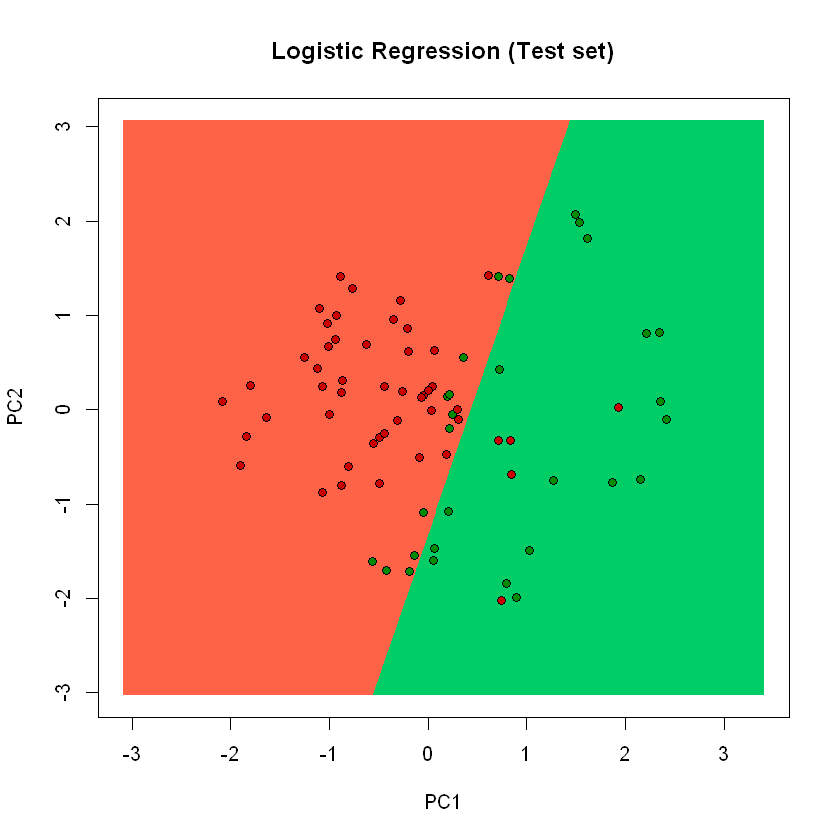

In [42]:
# Visualize the results
library(ElemStatLearn)
set = test_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
prob_set = predict(model, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3], 
     main = 'Logistic Regression (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## 2. Kernel PCA

In [45]:
## Apply Kernel PCA
library(kernlab)
kpca = kpca(~., data = train_set[-label_col], kernel = 'rbfdot', features = 2)
train_kpca = as.data.frame(predict(kpca, train_set))
train_kpca$label = train_set$label
test_kpca = as.data.frame(predict(kpca, test_set))
test_kpca$label = test_set$label

In [48]:
# Train/Evaluate Logistic Regression 
model = glm(formula = label ~ ., data = train_kpca, 
            family = binomial)
prob_pred = predict(model, type = 'response', newdata = test_kpca[-3])
predictions = ifelse(prob_pred > 0.5, 1, 0)
confusionMatrix(predictions, test_kpca$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46 11
         1  5 18
                                          
               Accuracy : 0.8             
                 95% CI : (0.6956, 0.8811)
    No Information Rate : 0.6375          
    P-Value [Acc > NIR] : 0.00125         
                                          
                  Kappa : 0.5471          
 Mcnemar's Test P-Value : 0.21130         
                                          
            Sensitivity : 0.9020          
            Specificity : 0.6207          
         Pos Pred Value : 0.8070          
         Neg Pred Value : 0.7826          
             Prevalence : 0.6375          
         Detection Rate : 0.5750          
   Detection Prevalence : 0.7125          
      Balanced Accuracy : 0.7613          
                                          
       'Positive' Class : 0               
                                          

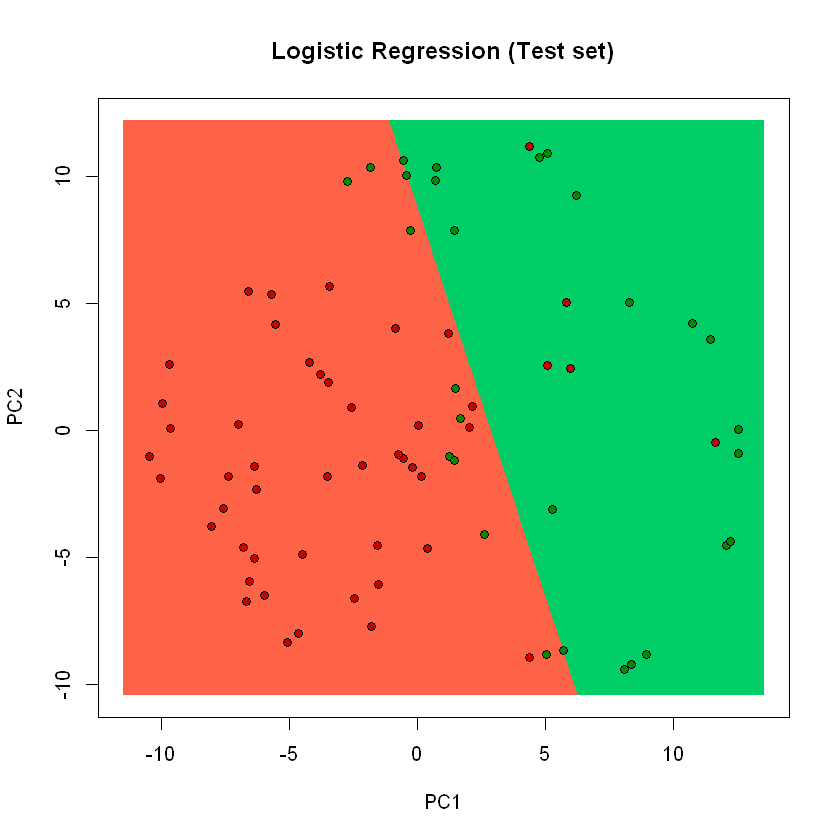

In [49]:
# Visualize the results
library(ElemStatLearn)
set = test_kpca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(model, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3], main = 'Logistic Regression (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))